# EA project

In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.experiment_module.experiment import Experiment
from vangogh.experiment_module.experiment import compare_experiments
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import cma
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

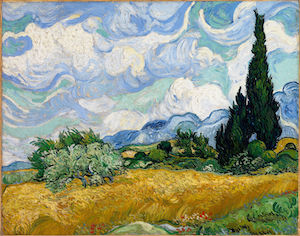

In [2]:
display(REFERENCE_IMAGE)

In [3]:
# Enable to show live rendering of best individual during optimization
display_output = True
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

In [4]:
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output and time["num-generations"] == evo.generation_budget:
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")


## Classic Example

### Tournament size 4

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F17867ECD60>
 - Evolution Type: p+o
 - Population Size: 200
 - Generation Budget: 10
 - Evaluation Budget: -1
 - Crossover Method: TWO_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7f1786826050>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 133111 avg. fitness: 144681.56
generation: 2 best fitness: 129351 avg. fitness: 139676.025
generation: 3 best fitness: 126533 avg. fitness: 135520.6
generation: 4 best fitness: 124991 avg. fitness: 132111.725
generation: 5 best fitness: 120781 avg. fitness: 129644.06
generation: 6 best fitness: 120781 avg. 

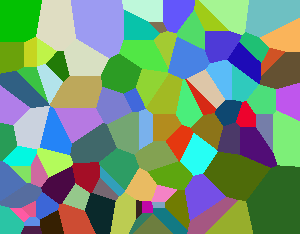

Run #1
Elite fitness 115312
Total Runtime 4.69 sec

Average Elite Fitness over 1 runs: 115312.0


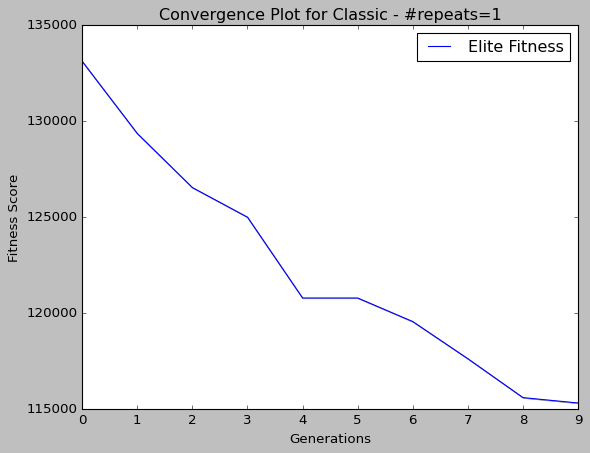

In [5]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    population_size=200,
                    generation_reporter=reporter,
                    crossover_method="TWO_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=10,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_4',
                    verbose=verbose_output)

experiment_classic = Experiment("Classic", evo)

results_1 = experiment_classic.run_experiment(repeats=1, plot_converge=True, mode="generation")

### Tournament size 8

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F2D6F7A7550>
 - Evolution Type: p+o
 - Population Size: 160
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f2ddfe49870>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 102362
Total Runtime 10.09 sec

Run #2
Elite fitness 107211
Total Runtime 9.91 sec

Run #3
Elite fitness 107817
Total Runtime 9.78 sec

Run #4
Elite fitness 99598
Total Runtime 9.95 sec

Run #5
Elite fitness 102282
Total Runtime 9.78 sec

Run #6
Elite fitness 105037
Total Runtime 9.71 sec

Run #7
Elite fitness 10

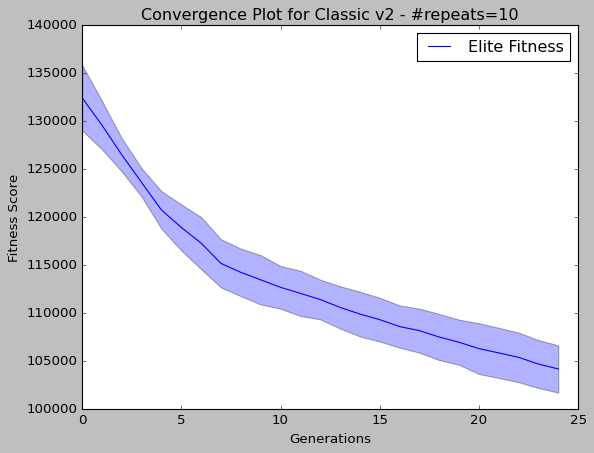

In [6]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    population_size=160,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=25,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_8',
                    verbose=verbose_output)

experiment_classic_2 = Experiment("Classic v2", evo)

results_2 = experiment_classic_2.run_experiment(repeats=10, plot_converge=True, mode="generation")

### Compare the 2 different evolution experiments

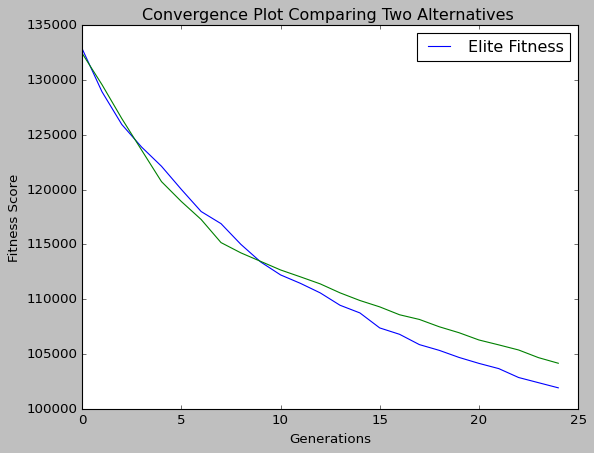

Null hypothesis rejected with p-value of 0.005578815937042236


In [15]:
alpha = 0.05
p_value, significance_result = compare_experiments(results_1, results_2, alpha, plot=True, test="wilcoxon")
print(f"{significance_result} with p-value of {p_value}")

### Hyperparameter study for selection methods and population

Running new experiment: Classic_population_size_16_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 16
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 119094
Total Runtime 5.44 sec

Run #2
Elite fitness 127649
Total Runtime 5.37 sec

Average Elite Fitness over 2 runs: 123371.5


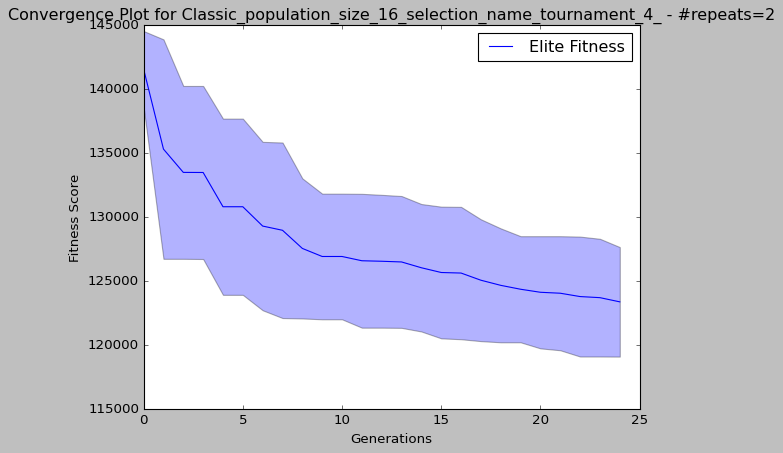

Running new experiment: Classic_population_size_16_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 16
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 127817
Total Runtime 5.33 sec

Run #2
Elite fitness 120594
Total Runtime 5.27 sec

Average Elite Fitness over 2 runs: 124205.5


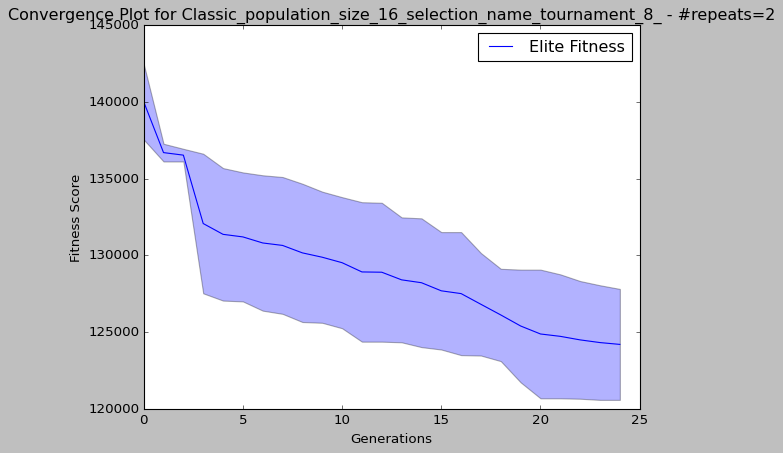

Running new experiment: Classic_population_size_32_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 32
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 122696
Total Runtime 5.88 sec

Run #2
Elite fitness 120713
Total Runtime 5.96 sec

Average Elite Fitness over 2 runs: 121704.5


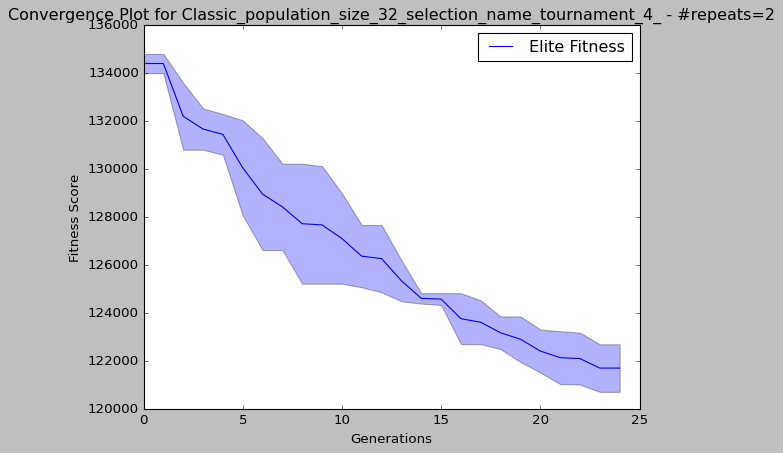

Running new experiment: Classic_population_size_32_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 32
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 116641
Total Runtime 5.84 sec

Run #2
Elite fitness 118050
Total Runtime 6.0 sec

Average Elite Fitness over 2 runs: 117345.5


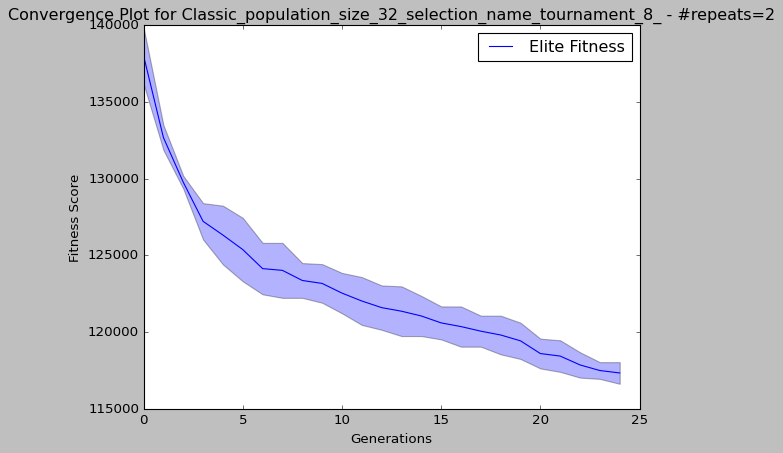

Best hyperparameters found: Classic_population_size_32_selection_name_tournament_8_ with score 117345.5


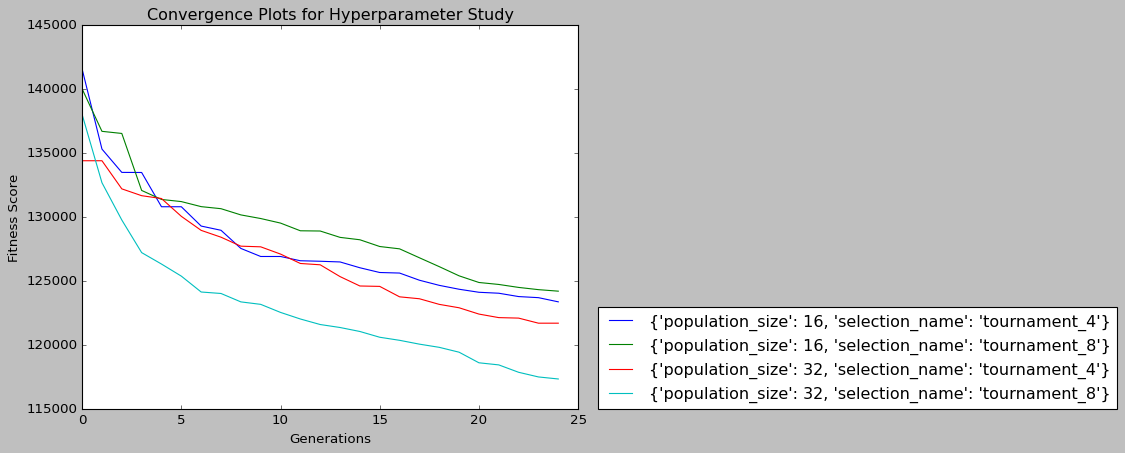

In [6]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=25,
                    verbose=verbose_output)

experiment_classic_hs = Experiment("Classic", evo)

params = {
    'population_size': [16, 32],
    'selection_name': ['tournament_4', 'tournament_8']
}

data = experiment_classic_hs.hyperparameter_search(params, repeats=2, plot_converge=True, plot=True)


## UMDA

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7FE8F502BD30>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7fe9629c64d0>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 135698 avg. fitness: 139872.5625
generation: 2 best fitness: 127591 avg. fitness: 134181.86875
generation: 3 best fitness: 127591 avg. fitness: 129530.75625
generation: 4 best fitness: 120799 avg. fitness: 126042.5625
generation: 5 best fitness: 116604 avg. fitness: 121717.75
generation: 6 best fitness: 1

generation: 126 best fitness: 41852 avg. fitness: 41978.35
generation: 127 best fitness: 41726 avg. fitness: 41839.13125
generation: 128 best fitness: 41463 avg. fitness: 41696.425
generation: 129 best fitness: 41463 avg. fitness: 41528.11875
generation: 130 best fitness: 41334 avg. fitness: 41433.53125
generation: 131 best fitness: 41248 avg. fitness: 41342.26875
generation: 132 best fitness: 41114 avg. fitness: 41225.09375
generation: 133 best fitness: 41011 avg. fitness: 41110.06875
generation: 134 best fitness: 40930 avg. fitness: 41016.16875
generation: 135 best fitness: 40806 avg. fitness: 40934.81875
generation: 136 best fitness: 40743 avg. fitness: 40829.18125
generation: 137 best fitness: 40659 avg. fitness: 40737.23125
generation: 138 best fitness: 40573 avg. fitness: 40657.14375
generation: 139 best fitness: 40511 avg. fitness: 40581.84375
generation: 140 best fitness: 40421 avg. fitness: 40512.4875
generation: 141 best fitness: 40392 avg. fitness: 40440.8625
generation: 142

generation: 261 best fitness: 34022 avg. fitness: 34044.325
generation: 262 best fitness: 34014 avg. fitness: 34024.89375
generation: 263 best fitness: 33966 avg. fitness: 33998.05
generation: 264 best fitness: 33963 avg. fitness: 33971.89375
generation: 265 best fitness: 33915 avg. fitness: 33960.425
generation: 266 best fitness: 33879 avg. fitness: 33934.39375
generation: 267 best fitness: 33847 avg. fitness: 33878.90625
generation: 268 best fitness: 33832 avg. fitness: 33849.9375
generation: 269 best fitness: 33790 avg. fitness: 33829.69375
generation: 270 best fitness: 33777 avg. fitness: 33800.64375
generation: 271 best fitness: 33732 avg. fitness: 33777.78125
generation: 272 best fitness: 33700 avg. fitness: 33746.725
generation: 273 best fitness: 33683 avg. fitness: 33711.55
generation: 274 best fitness: 33626 avg. fitness: 33685.50625
generation: 275 best fitness: 33626 avg. fitness: 33656.2
generation: 276 best fitness: 33568 avg. fitness: 33603.775
generation: 277 best fitnes

generation: 396 best fitness: 31623 avg. fitness: 31631.5125
generation: 397 best fitness: 31619 avg. fitness: 31625.53125
generation: 398 best fitness: 31606 avg. fitness: 31617.78125
generation: 399 best fitness: 31603 avg. fitness: 31608.18125
generation: 400 best fitness: 31600 avg. fitness: 31603.7875
generation: 401 best fitness: 31599 avg. fitness: 31601.40625
generation: 402 best fitness: 31595 avg. fitness: 31598.49375
generation: 403 best fitness: 31579 avg. fitness: 31595.15
generation: 404 best fitness: 31579 avg. fitness: 31587.75625
generation: 405 best fitness: 31574 avg. fitness: 31578.53125
generation: 406 best fitness: 31569 avg. fitness: 31575.01875
generation: 407 best fitness: 31569 avg. fitness: 31570.9625
generation: 408 best fitness: 31560 avg. fitness: 31566.8
generation: 409 best fitness: 31560 avg. fitness: 31561.09375
generation: 410 best fitness: 31553 avg. fitness: 31558.6625
generation: 411 best fitness: 31551 avg. fitness: 31554.1375
generation: 412 best

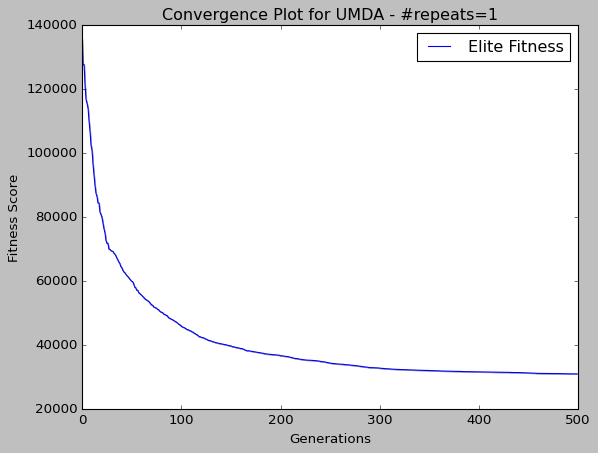

In [5]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                population_size=160,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.2,
                selection_name='tournament_16',
                verbose=verbose_output)

experiment_umda = Experiment("UMDA", evo)

umda_results = experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="generation")

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.1_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34500
Total Runtime 120.15 sec

Run #2
Elite fitness 35354
Total Runtime 122.09 sec

Run #3
Elite fitness 35633
Total Runtime 119.37 sec

Average Elite Fitness over 3 runs:

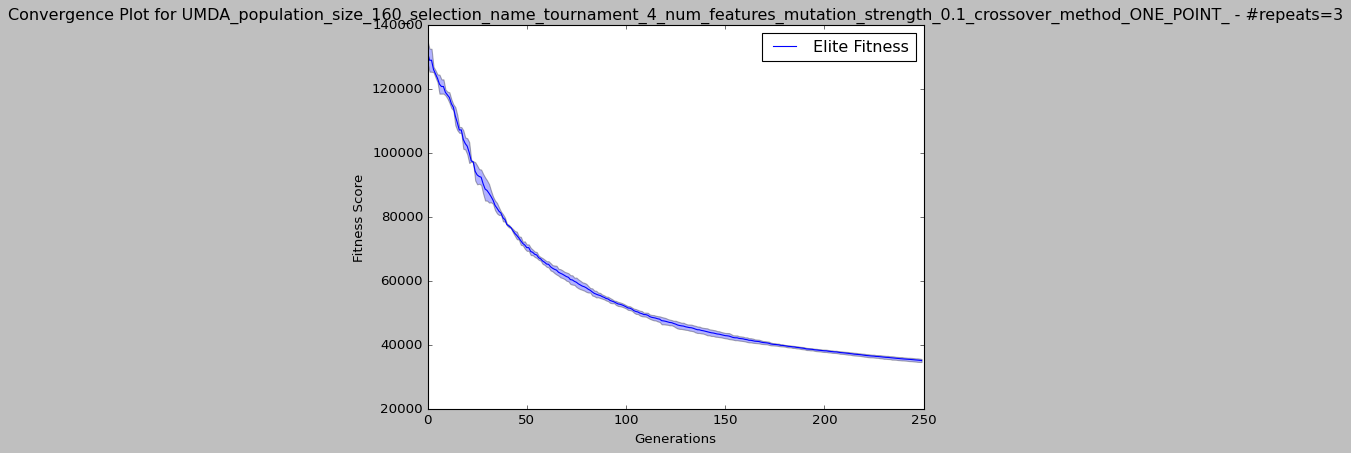

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.1_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 35670
Total Runtime 121.76 sec

Run #2
Elite fitness 35173
Total Runtime 119.86 sec

Run #3
Elite fitness 35073
Total Runtime 120.31 sec

Average Elite Fitness over 3 runs: 353

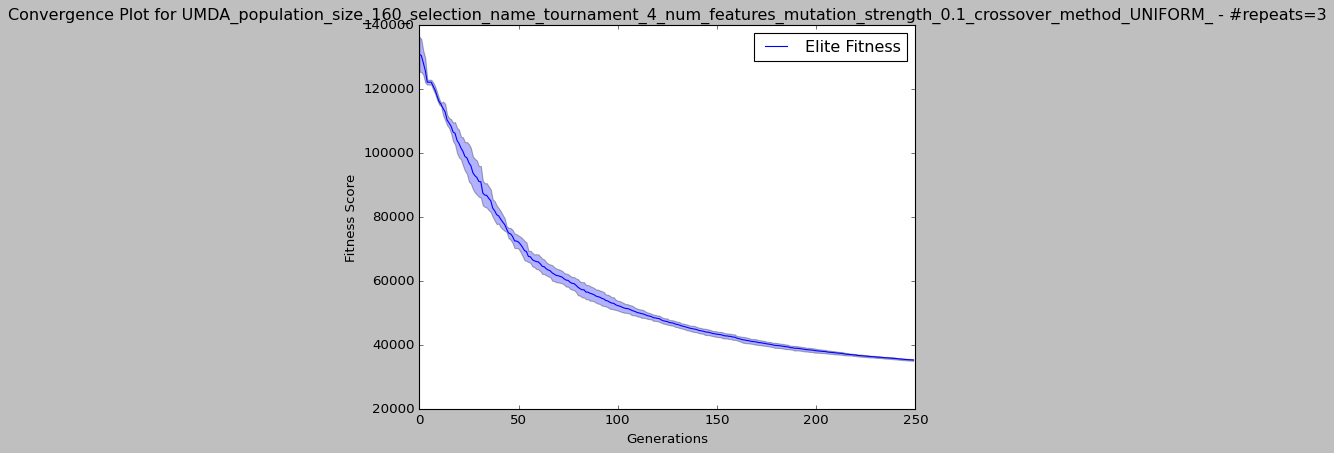

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.2_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34238
Total Runtime 119.93 sec

Run #2
Elite fitness 35836
Total Runtime 118.8 sec

Run #3
Elite fitness 35348
Total Runtime 119.72 sec

Average Elite Fitness over 3 runs: 

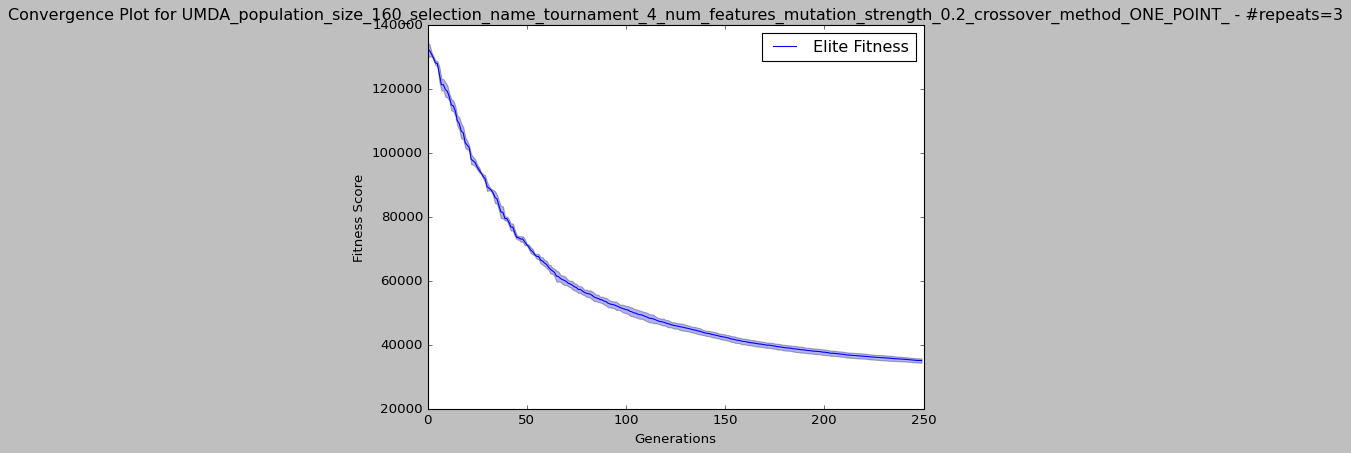

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.2_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 36387
Total Runtime 120.01 sec

Run #2
Elite fitness 34255
Total Runtime 119.94 sec

Run #3
Elite fitness 34831
Total Runtime 120.14 sec

Average Elite Fitness over 3 runs: 351

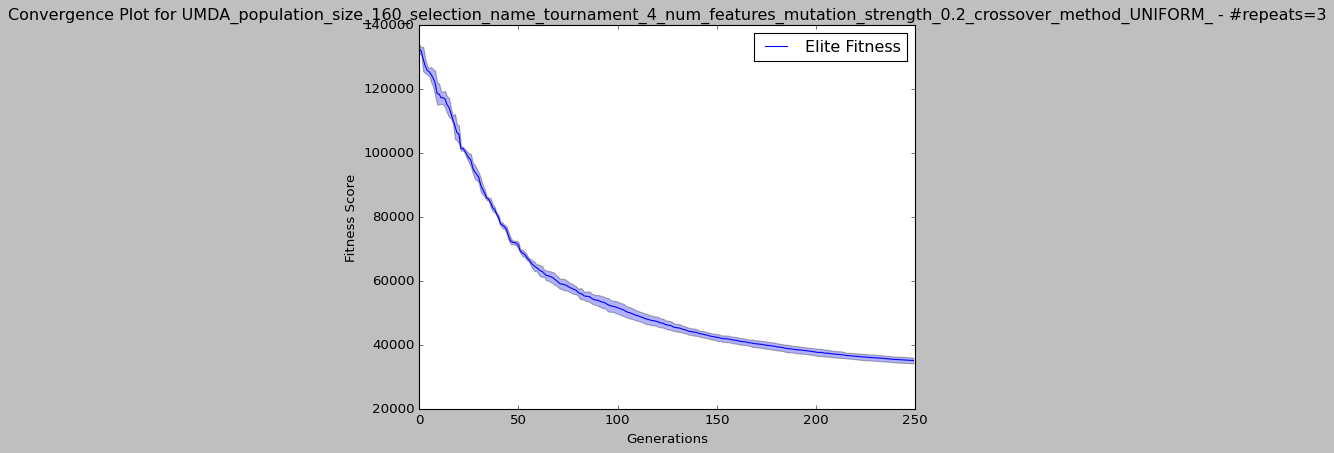

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.3_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 35436
Total Runtime 118.97 sec

Run #2
Elite fitness 36865
Total Runtime 119.68 sec

Run #3
Elite fitness 35338
Total Runtime 119.29 sec

Average Elite Fitness over 3 runs:

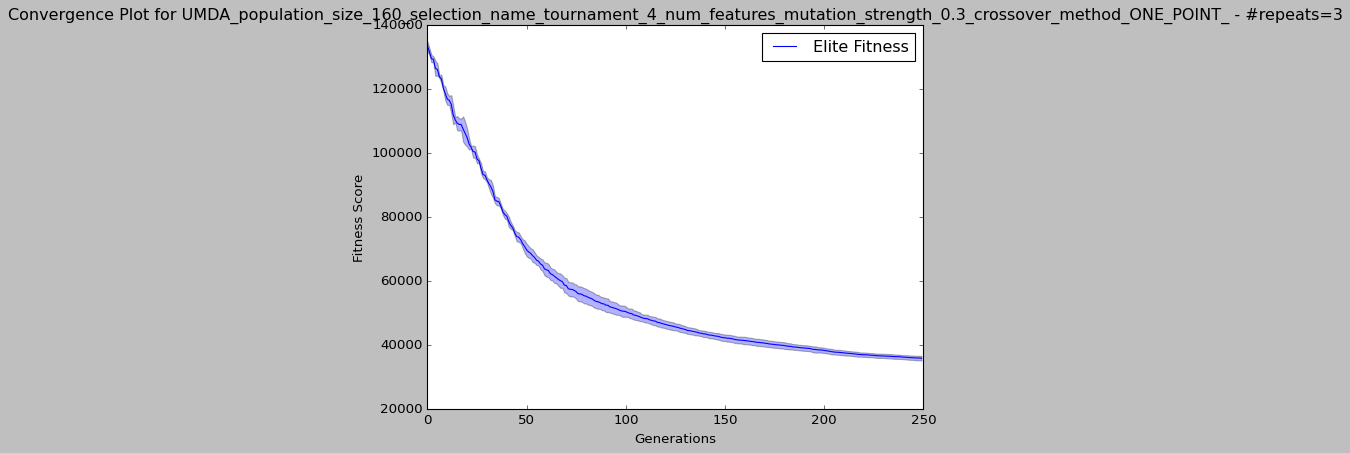

Running new experiment: UMDA_population_size_160_selection_name_tournament_4_num_features_mutation_strength_0.3_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 35646
Total Runtime 120.46 sec

Run #2
Elite fitness 34933
Total Runtime 120.57 sec

Run #3
Elite fitness 33337
Total Runtime 120.53 sec

Average Elite Fitness over 3 runs: 346

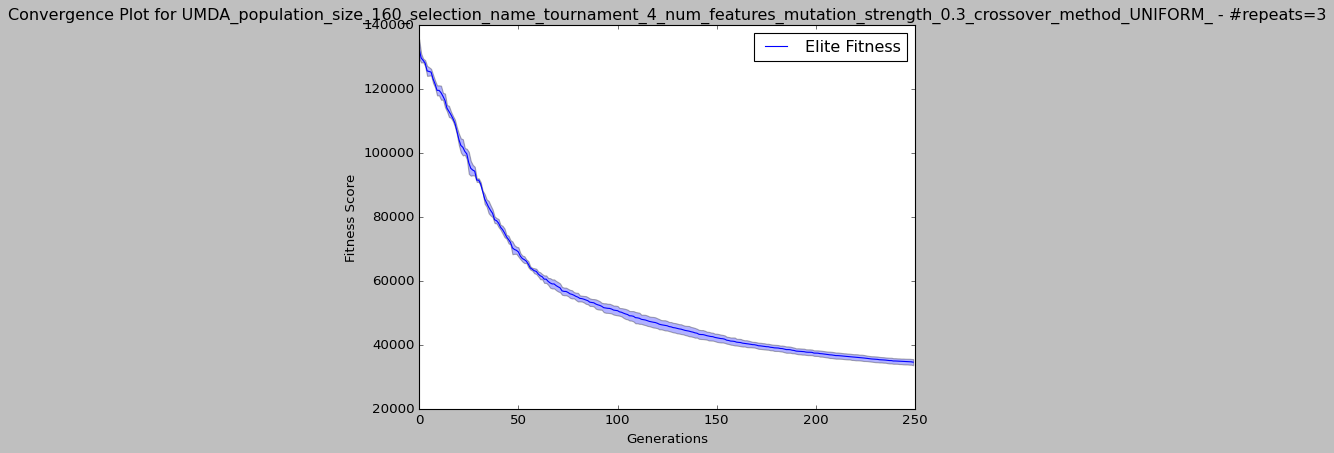

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.1_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34375
Total Runtime 119.64 sec

Run #2
Elite fitness 34325
Total Runtime 120.23 sec

Run #3
Elite fitness 33701
Total Runtime 119.29 sec

Average Elite Fitness over 3 runs:

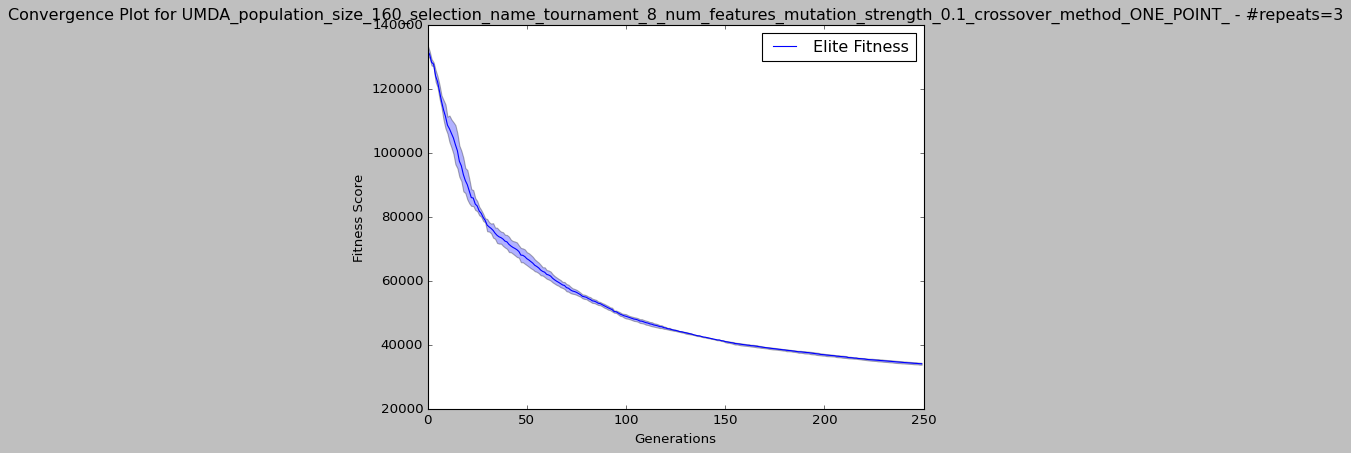

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.1_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34498
Total Runtime 120.63 sec

Run #2
Elite fitness 33653
Total Runtime 120.07 sec

Run #3
Elite fitness 35774
Total Runtime 120.08 sec

Average Elite Fitness over 3 runs: 346

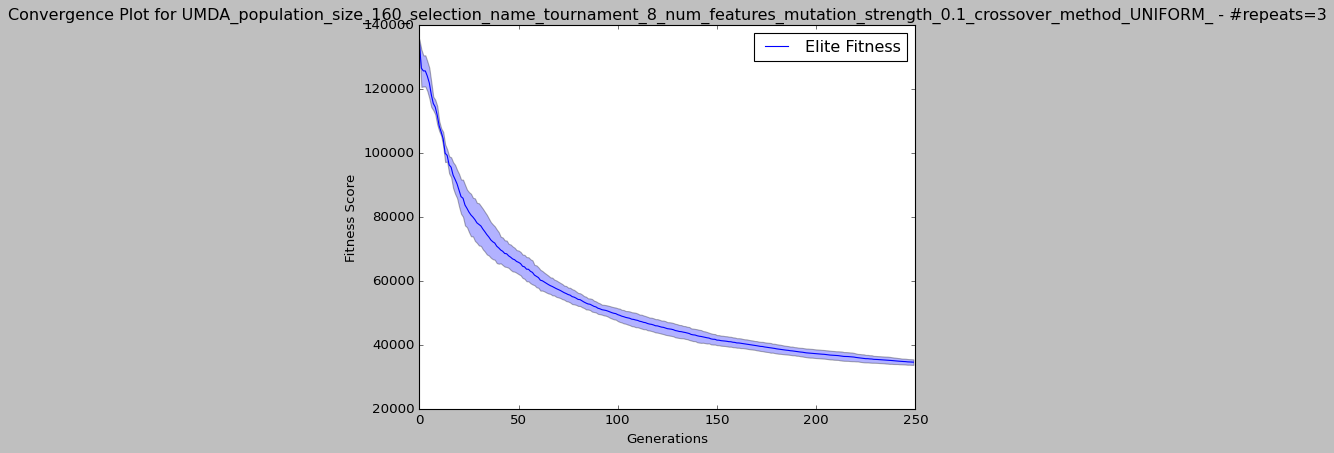

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.2_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34297
Total Runtime 120.54 sec

Run #2
Elite fitness 36414
Total Runtime 120.35 sec

Run #3
Elite fitness 33696
Total Runtime 120.03 sec

Average Elite Fitness over 3 runs:

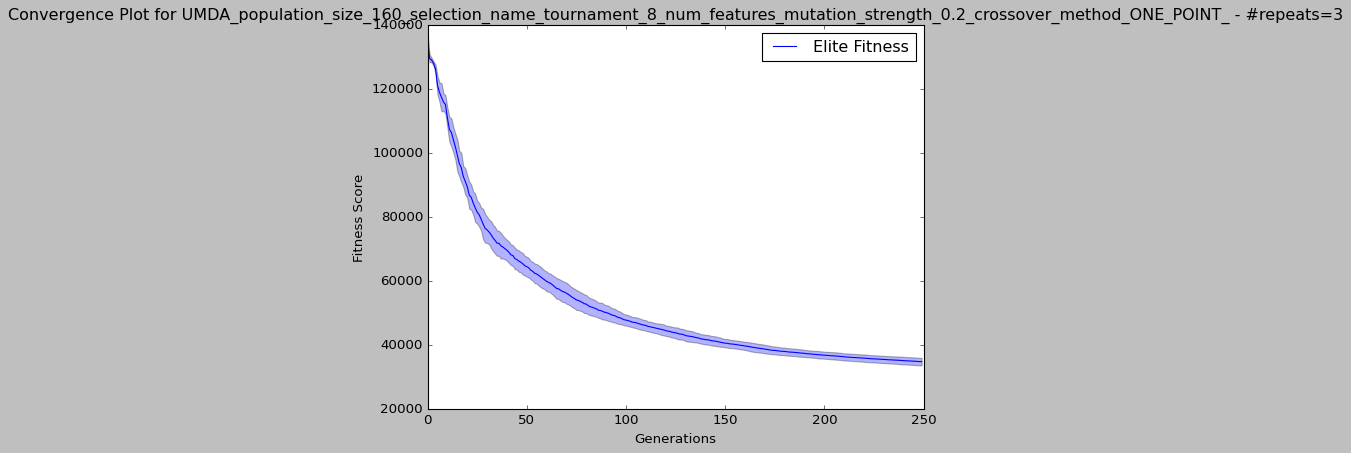

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.2_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34135
Total Runtime 119.06 sec

Run #2
Elite fitness 33640
Total Runtime 120.58 sec

Run #3
Elite fitness 32775
Total Runtime 119.73 sec

Average Elite Fitness over 3 runs: 335

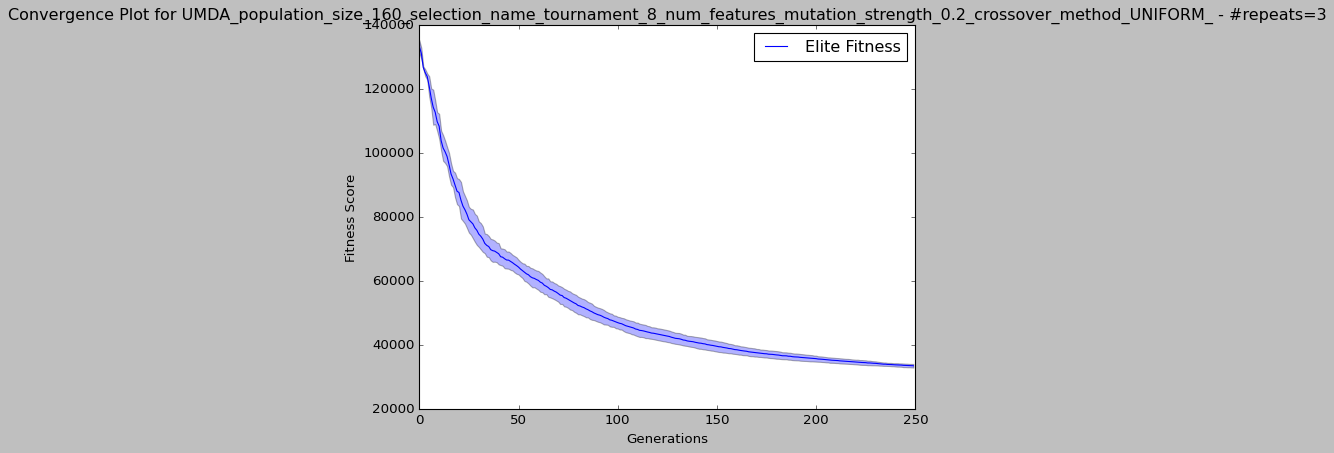

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.3_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34860
Total Runtime 120.5 sec

Run #2
Elite fitness 36303
Total Runtime 120.72 sec

Run #3
Elite fitness 34102
Total Runtime 120.0 sec

Average Elite Fitness over 3 runs: 3

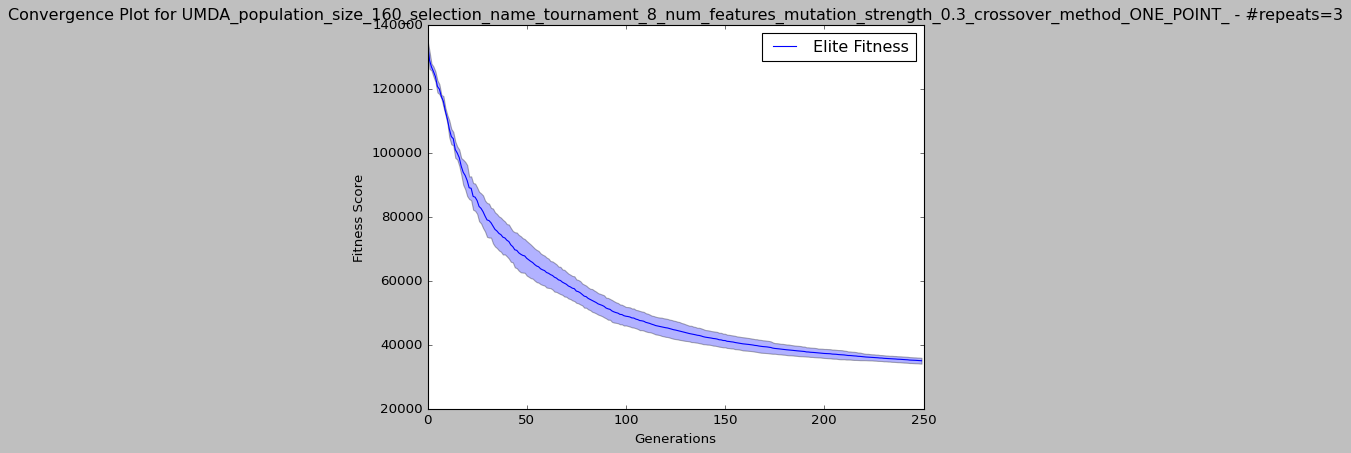

Running new experiment: UMDA_population_size_160_selection_name_tournament_8_num_features_mutation_strength_0.3_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 36029
Total Runtime 120.92 sec

Run #2
Elite fitness 36342
Total Runtime 119.78 sec

Run #3
Elite fitness 33792
Total Runtime 119.99 sec

Average Elite Fitness over 3 runs: 353

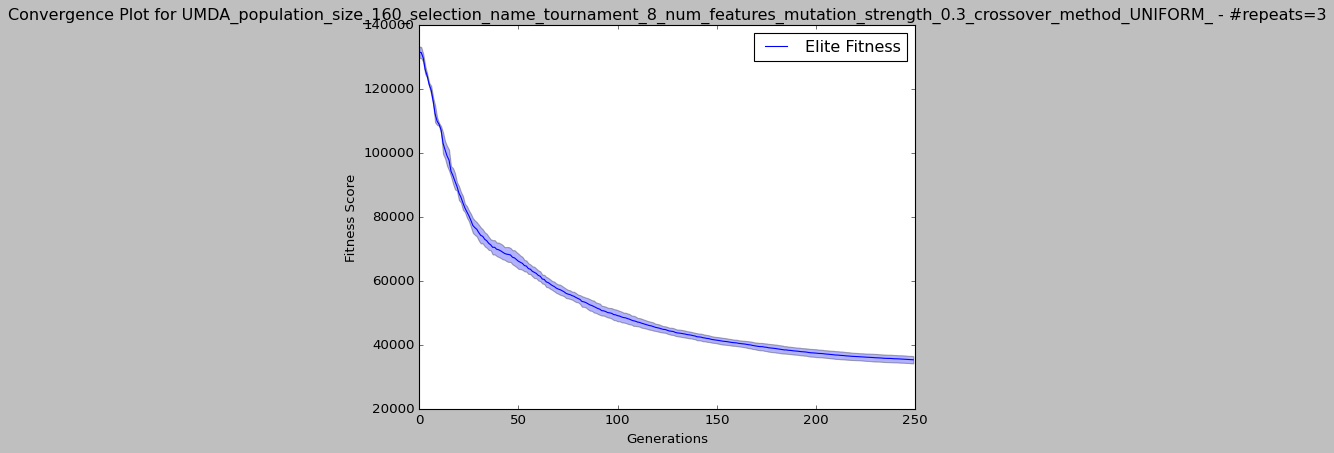

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.1_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34286
Total Runtime 119.93 sec

Run #2
Elite fitness 35741
Total Runtime 119.35 sec

Run #3
Elite fitness 33245
Total Runtime 120.51 sec

Average Elite Fitness over 3 run

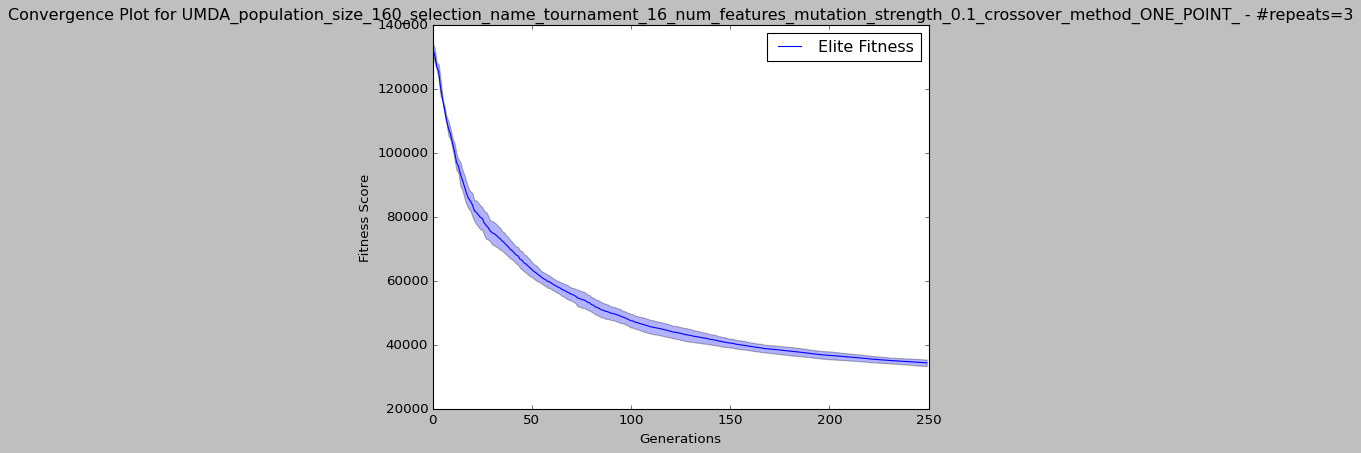

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.1_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.1
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34047
Total Runtime 120.42 sec

Run #2
Elite fitness 33709
Total Runtime 120.0 sec

Run #3
Elite fitness 34403
Total Runtime 120.92 sec

Average Elite Fitness over 3 runs: 34

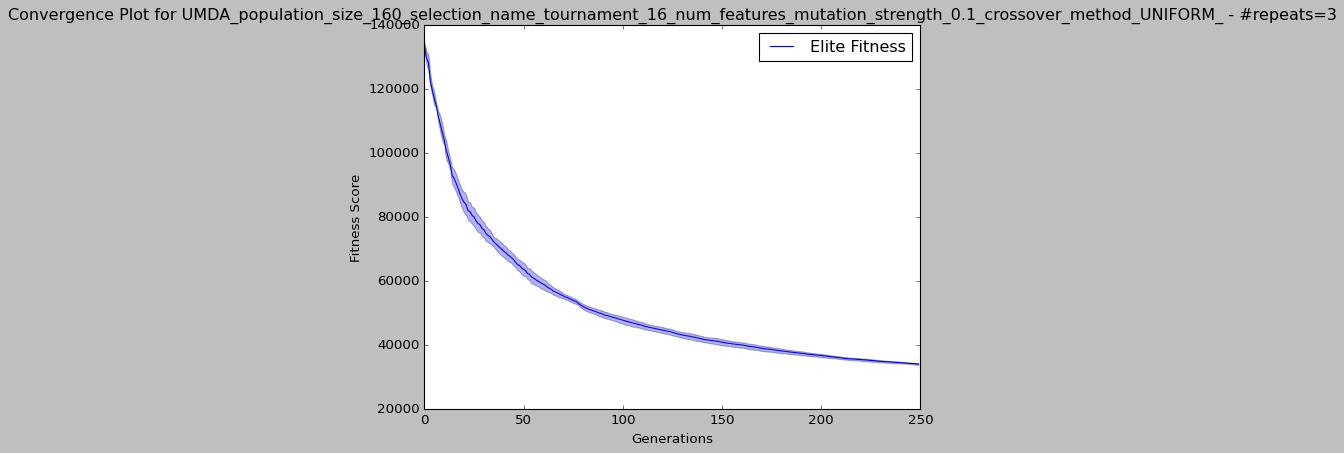

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.2_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 32725
Total Runtime 120.63 sec

Run #2
Elite fitness 31959
Total Runtime 120.32 sec

Run #3
Elite fitness 34564
Total Runtime 119.74 sec

Average Elite Fitness over 3 run

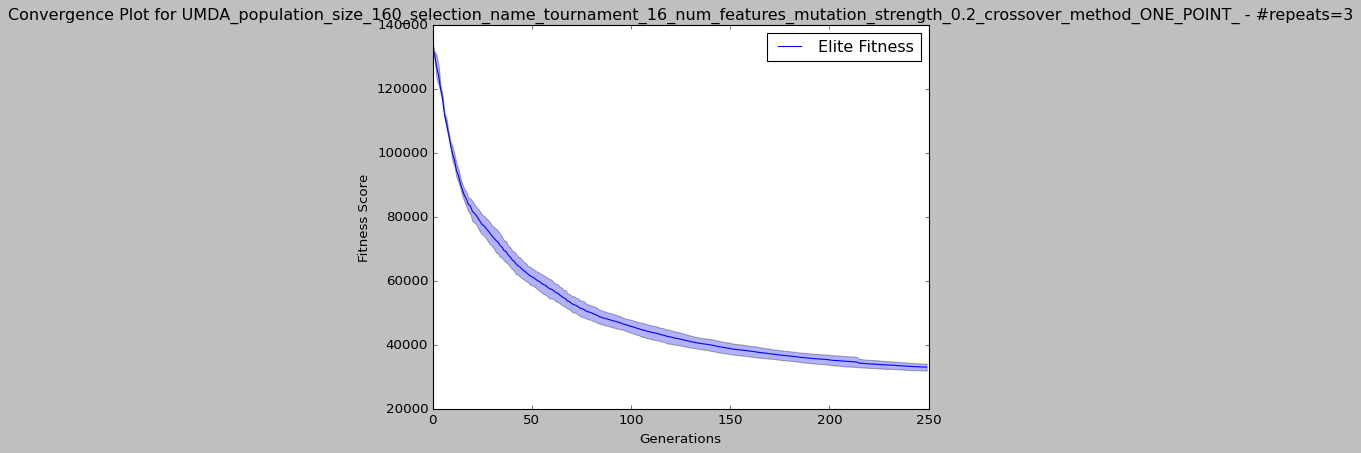

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.2_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 33475
Total Runtime 120.9 sec

Run #2
Elite fitness 33594
Total Runtime 120.3 sec

Run #3
Elite fitness 35351
Total Runtime 121.74 sec

Average Elite Fitness over 3 runs: 341

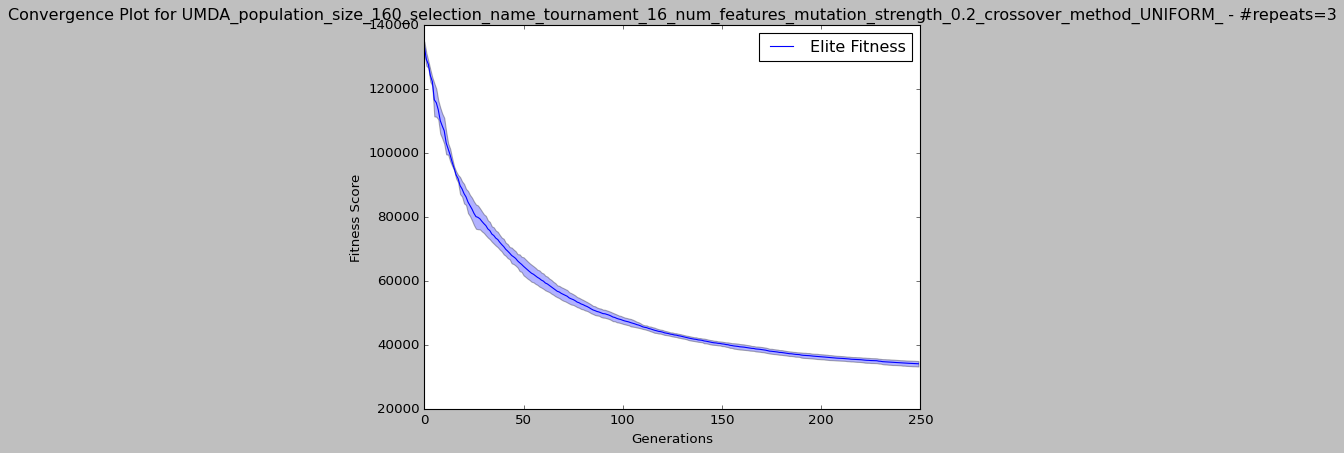

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.3_crossover_method_ONE_POINT_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 34886
Total Runtime 121.09 sec

Run #2
Elite fitness 34421
Total Runtime 120.25 sec

Run #3
Elite fitness 33712
Total Runtime 120.88 sec

Average Elite Fitness over 3 run

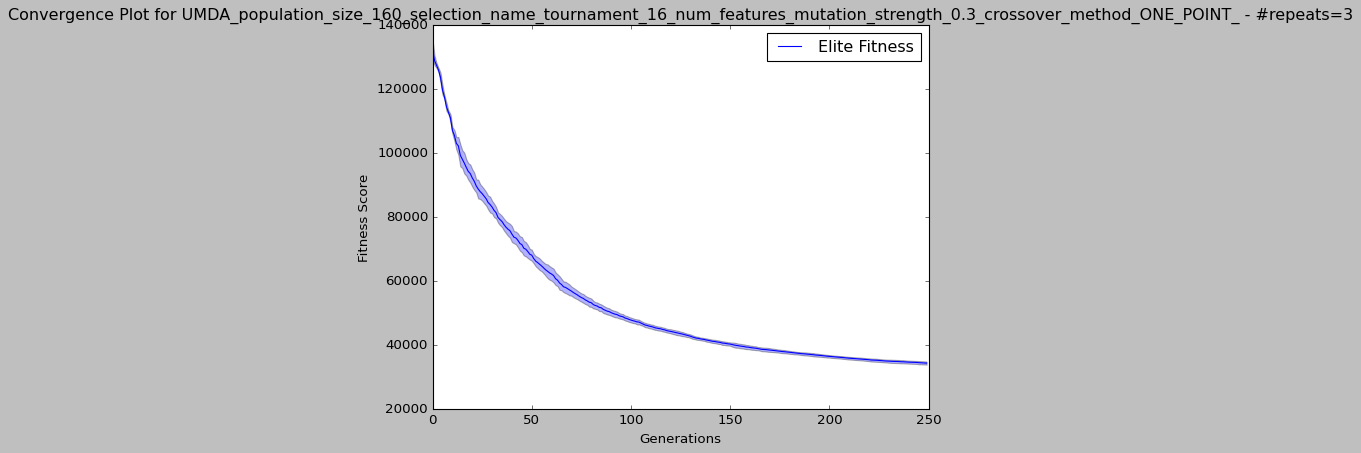

Running new experiment: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.3_crossover_method_UNIFORM_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5C71AC3B80>
 - Evolution Type: UMDA
 - Population Size: 160
 - Generation Budget: 250
 - Evaluation Budget: -1
 - Crossover Method: UNIFORM
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.3
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 33936
Total Runtime 121.4 sec

Run #2
Elite fitness 32548
Total Runtime 120.86 sec

Run #3
Elite fitness 33325
Total Runtime 120.76 sec

Average Elite Fitness over 3 runs: 33

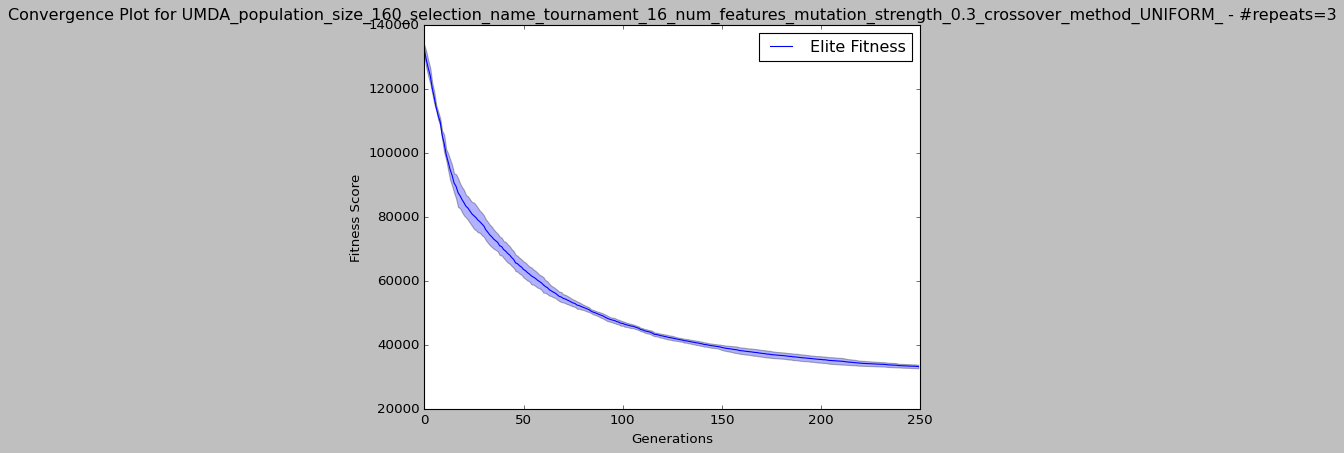

Best hyperparameters found: UMDA_population_size_160_selection_name_tournament_16_num_features_mutation_strength_0.2_crossover_method_ONE_POINT_ with score 33082.666666666664


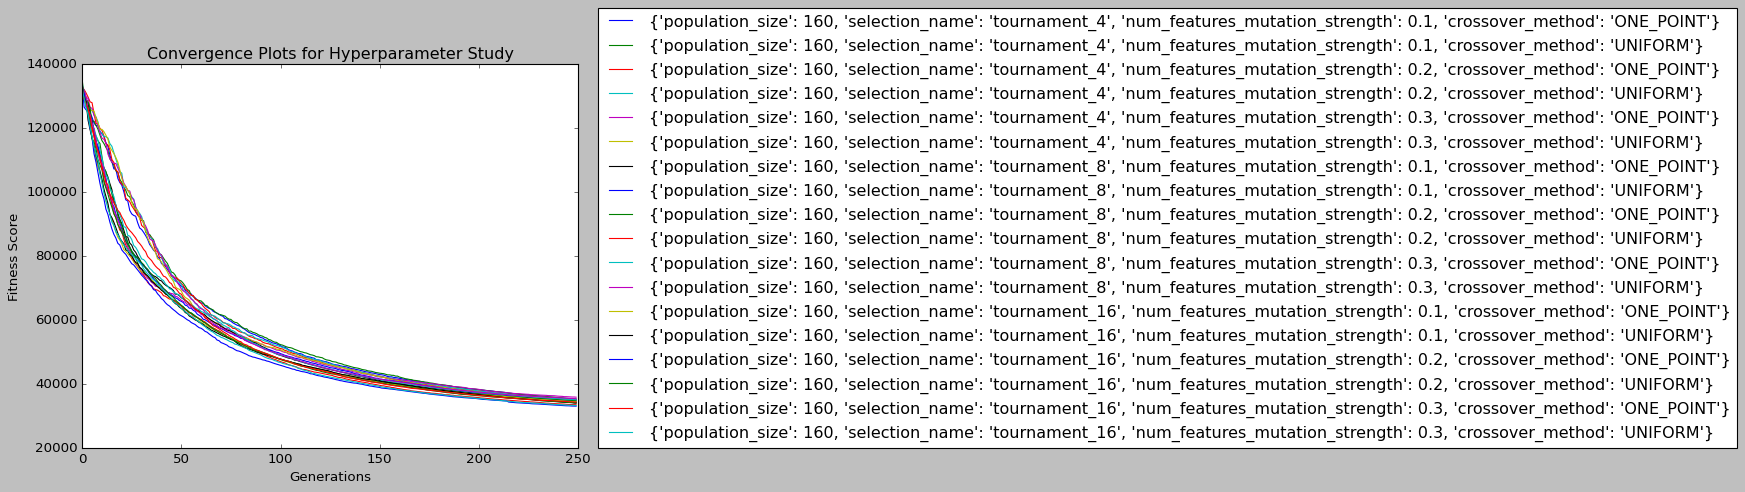

In [7]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                generation_reporter=reporter,
                seed=10,
                initialization="RANDOM",
                generation_budget=250,
                verbose=verbose_output)

experiment_umda = Experiment("UMDA", evo)

params = {
    'population_size': [160],
    'selection_name': ['tournament_4', 'tournament_8', 'tournament_16'],
    'num_features_mutation_strength' : [0.1, 0.2, 0.3],
    'crossover_method' : ["ONE_POINT", "UNIFORM"]
    
}

data = experiment_umda.hyperparameter_search(params, repeats=3, plot_converge=True, plot=True)


Running new experiment: UMDA_population_size_128_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 29217
Total Runtime 229.57 sec

Run #2
Elite fitness 31388
Total Runtime 228.02 sec

Run #3
Elite fitness 30792
Total Runtime 293.95 sec

Average Elite Fitness over 3 runs: 30465.666666666668


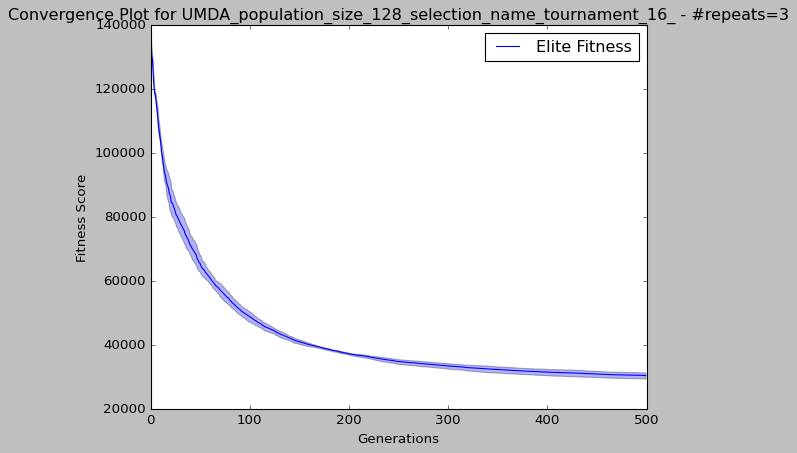

Running new experiment: UMDA_population_size_128_selection_name_tournament_32_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 128
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_32
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 30332
Total Runtime 236.69 sec

Run #2
Elite fitness 31722
Total Runtime 237.5 sec

Run #3
Elite fitness 29799
Total Runtime 233.75 sec

Average Elite Fitness over 3 runs: 30617.666666666668


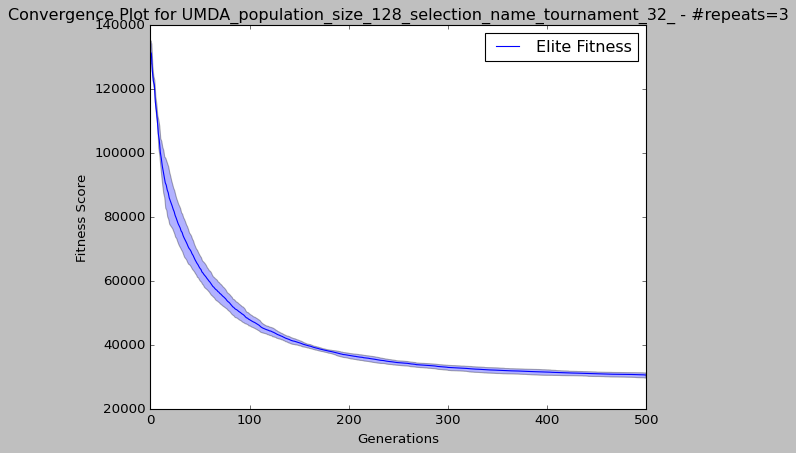

Running new experiment: UMDA_population_size_192_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 192
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 30251
Total Runtime 275.48 sec

Run #2
Elite fitness 28043
Total Runtime 273.26 sec

Run #3
Elite fitness 28861
Total Runtime 274.33 sec

Average Elite Fitness over 3 runs: 29051.666666666668


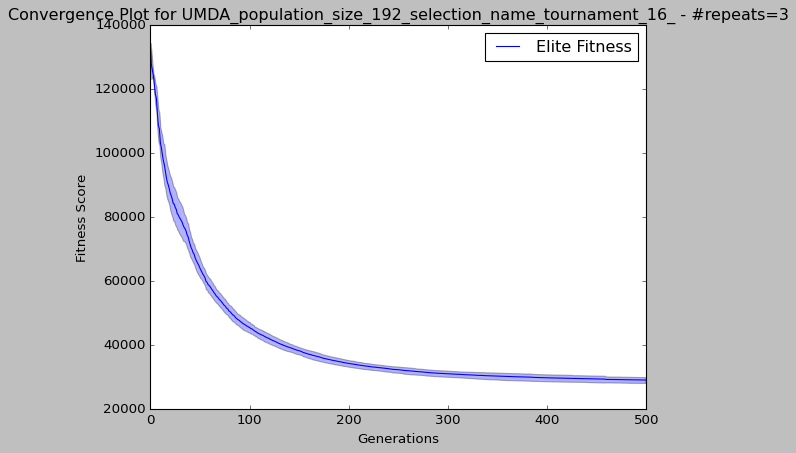

Running new experiment: UMDA_population_size_192_selection_name_tournament_32_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 192
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_32
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 28593
Total Runtime 303.47 sec

Run #2
Elite fitness 30770
Total Runtime 285.45 sec

Run #3
Elite fitness 28357
Total Runtime 279.83 sec

Average Elite Fitness over 3 runs: 29240.0


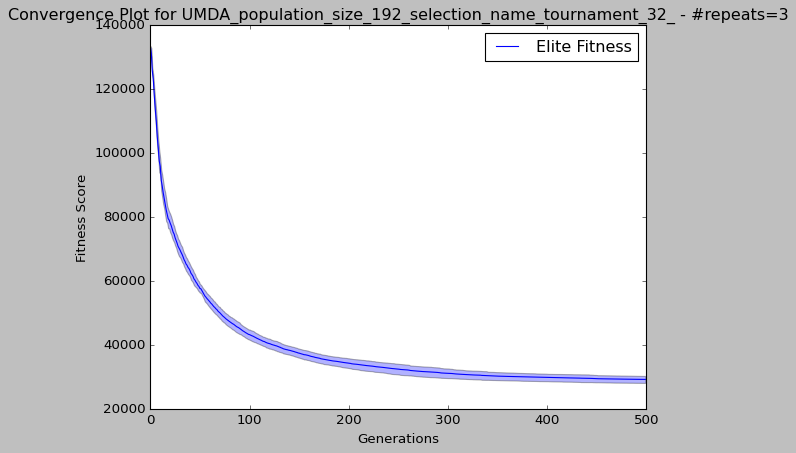

Running new experiment: UMDA_population_size_256_selection_name_tournament_16_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_16
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 29044
Total Runtime 313.58 sec

Run #2
Elite fitness 29137
Total Runtime 325.43 sec

Run #3
Elite fitness 28466
Total Runtime 317.95 sec

Average Elite Fitness over 3 runs: 28882.333333333332


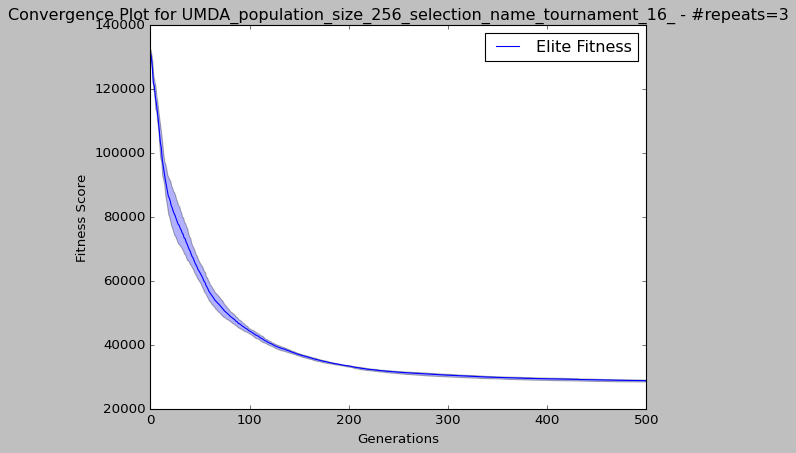

Running new experiment: UMDA_population_size_256_selection_name_tournament_32_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F5CB1FA3D90>
 - Evolution Type: UMDA
 - Population Size: 256
 - Generation Budget: 500
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.2
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_32
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f5cdf44e710>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 30969
Total Runtime 323.67 sec

Run #2
Elite fitness 29666
Total Runtime 322.63 sec

Run #3
Elite fitness 29587
Total Runtime 321.14 sec

Average Elite Fitness over 3 runs: 30074.0


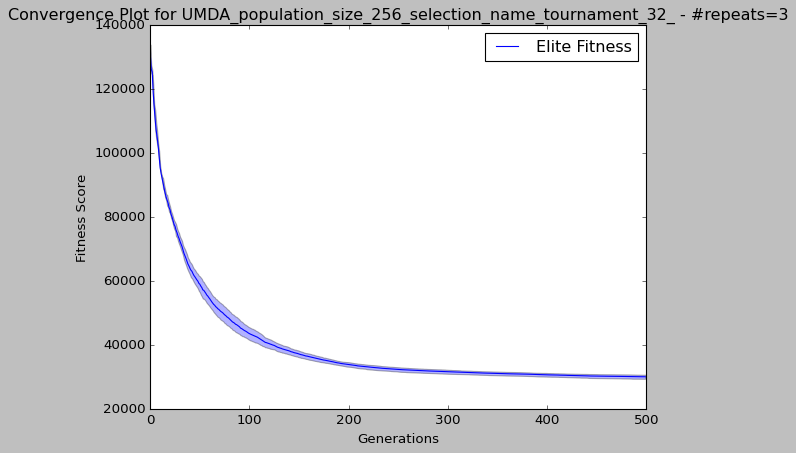

Best hyperparameters found: UMDA_population_size_256_selection_name_tournament_16_ with score 28882.333333333332


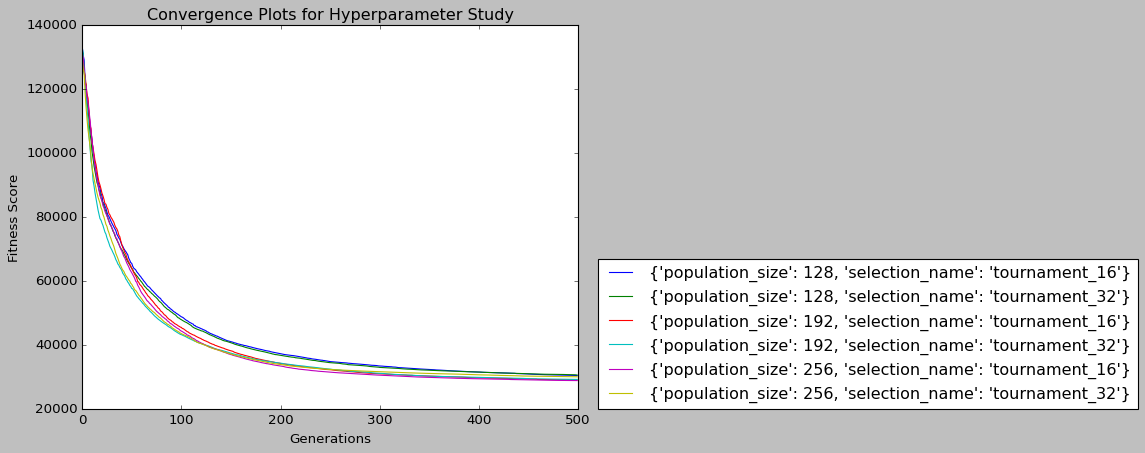

In [10]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.2,
                verbose=verbose_output)

experiment_umda = Experiment("UMDA", evo)

params = {
    'population_size': [128, 192, 256],
    'selection_name': ['tournament_16', 'tournament_32'],
    
}

data = experiment_umda.hyperparameter_search(params, repeats=3, plot_converge=True, plot=True)


## PBIL

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F03538D8970>
 - Evolution Type: PBIL
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.5
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 116333
Total Runtime 151.12 sec

Average Elite Fitness over 1 runs: 116333.0


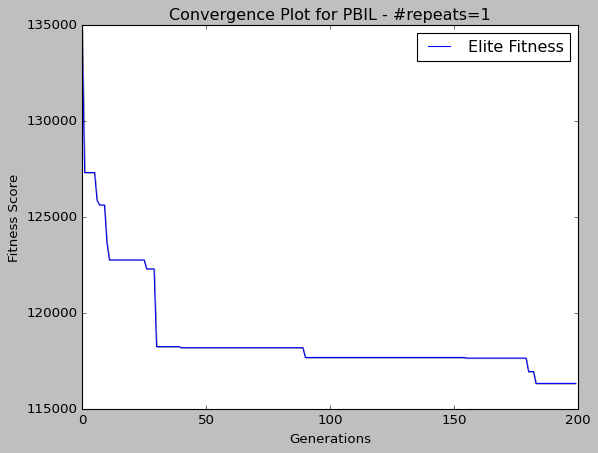

array([134869., 127317., 127317., 127317., 127317., 127317., 125877.,
       125624., 125624., 125624., 123657., 122763., 122763., 122763.,
       122763., 122763., 122763., 122763., 122763., 122763., 122763.,
       122763., 122763., 122763., 122763., 122763., 122297., 122297.,
       122297., 122297., 118250., 118250., 118250., 118250., 118250.,
       118250., 118250., 118250., 118250., 118250., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 117685.,
       117685., 117685., 117685., 117685., 117685., 117685., 117685.,
       117685., 1176

In [8]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PBIL",
                population_size=300,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=200,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output,
                learning_rate=0.5)

experiment_pbil = Experiment("PBIL", evo)

pbil_results = experiment_pbil.run_experiment(repeats=1, plot_converge=True, mode="generation")

## PFDA

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F69533E3A00>
 - Evolution Type: PFDA_RGB
 - Population Size: 192
 - Generation Budget: 100
 - Evaluation Budget: -1
 - Crossover Method: TWO_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: True
 - Generation Reporter: <function reporter at 0x7f697d0f6830>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

generation: 1 best fitness: 134034 avg. fitness: 145300.5625
generation: 2 best fitness: 129534 avg. fitness: 141136.89583333334
generation: 3 best fitness: 129534 avg. fitness: 138205.359375
generation: 4 best fitness: 123388 avg. fitness: 135644.10416666666
generation: 5 best fitness: 123388 avg. fitness: 133719.10416666666
ge

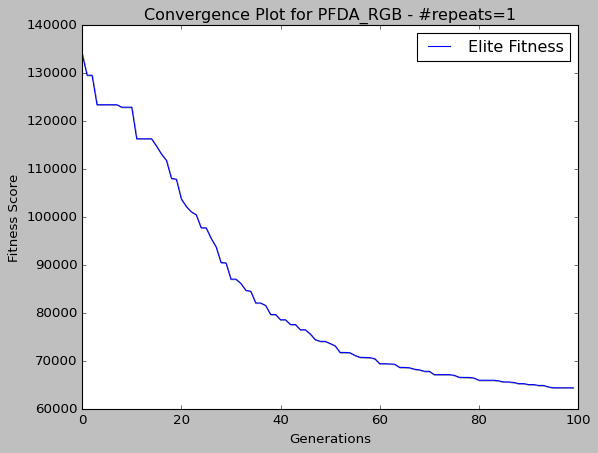

array([134034., 129534., 129534., 123388., 123388., 123388., 123388.,
       123388., 122878., 122878., 122878., 116291., 116291., 116291.,
       116291., 114760., 113103., 111789., 108055., 107860., 103746.,
       102189., 101088., 100466.,  97742.,  97742.,  95555.,  93799.,
        90510.,  90430.,  87053.,  87053.,  86161.,  84727.,  84514.,
        82079.,  82079.,  81561.,  79689.,  79689.,  78584.,  78584.,
        77604.,  77604.,  76499.,  76499.,  75620.,  74445.,  74097.,
        74097.,  73641.,  73160.,  71779.,  71779.,  71717.,  71160.,
        70771.,  70738.,  70699.,  70472.,  69431.,  69431.,  69385.,
        69332.,  68667.,  68667.,  68582.,  68292.,  68155.,  67854.,
        67854.,  67156.,  67156.,  67156.,  67156.,  67024.,  66613.,
        66576.,  66576.,  66448.,  65990.,  65990.,  65990.,  65990.,
        65860.,  65631.,  65631.,  65538.,  65284.,  65281.,  65094.,
        65094.,  64912.,  64912.,  64603.,  64418.,  64418.,  64418.,
        64418.,  644

In [7]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PFDA_RGB",
                population_size=192,
                generation_reporter=reporter,
                crossover_method="TWO_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=100,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)

experiment_PFDA_RGB = Experiment("PFDA_RGB", evo)

experiment_PFDA_RGB.run_experiment(repeats=1, plot_converge=True, mode="generation")